Import Modules, Load Data and Data Review

In [105]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # None: sınırsız, default:20
pd.set_option('display.max_rows', 500)    # None: sınırsız, default:10
pd.options.display.float_format = '{:.3f}'.format

EDA

In [106]:
df0 = pd.read_csv("cinemaTicket_Ref.csv")
df = df0.copy()

In [107]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.260,150000.000,26,610.329,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.080,80000.000,42,519.802,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.000,80000.000,32,160.000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.010,100000.000,12,108.992,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.670,80000.000,15,89.982,2018-05-05,5,2,5


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [109]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
56190,1484,34,29280000,244,0,4,55.450,120000.000,244,440.036,2018-03-24,3,1,24
56296,1484,34,29280000,244,0,4,55.450,120000.000,244,440.036,2018-03-24,3,1,24
56189,1484,35,29600000,296,0,3,59.800,100000.000,296,494.983,2018-03-24,3,1,24
56295,1484,35,29600000,296,0,3,59.800,100000.000,296,494.983,2018-03-24,3,1,24
56204,1484,39,20200000,202,0,3,39.150,100000.000,202,515.964,2018-03-24,3,1,24
56310,1484,39,20200000,202,0,3,39.150,100000.000,202,515.964,2018-03-24,3,1,24
56176,1484,48,52100000,526,0,14,14.530,99049.430,526,3620.096,2018-03-24,3,1,24
56282,1484,48,52100000,526,0,14,14.530,99049.430,526,3620.096,2018-03-24,3,1,24
56229,1484,50,9600000,96,0,3,17.980,100000.000,96,533.927,2018-03-24,3,1,24
56335,1484,50,9600000,96,0,3,17.980,100000.000,96,533.927,2018-03-24,3,1,24


In [110]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [111]:
duplicate_values(df)

Duplicate check...
There are 106 duplicated observations in the dataset.
106 duplicates were dropped!
No more duplicate rows!


In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
film_code,142418.000,1519.011,36.185,1471.000,1485.000,1498.000,1556.000,1589.000
cinema_code,142418.000,320.389,159.703,32.000,181.000,324.000,474.000,637.000
total_sales,142418.000,12335890.338,30637687.066,20000.000,1260000.000,3710000.000,11100000.000,1262819994.000
tickets_sold,142418.000,140.048,279.725,1.000,18.000,50.000,143.000,8499.000
tickets_out,142418.000,0.238,2.924,0.000,0.000,0.000,0.000,311.000
show_time,142418.000,3.932,3.056,1.000,2.000,3.000,5.000,60.000
occu_perc,142295.000,19.956,22.648,0.000,3.750,10.340,28.210,147.500
ticket_price,142418.000,81229.345,33237.810,483.871,60000.000,79440.559,100000.000,700000.000
ticket_use,142418.000,139.811,279.531,-219.000,18.000,50.000,143.000,8499.000
capacity,142295.000,854.570,952.940,-2.000,276.498,525.131,1038.961,9692.097


In [113]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       123
ticket_price      0
ticket_use        0
capacity        123
date              0
month             0
quarter           0
day               0
dtype: int64

In [114]:
df.dropna(inplace=True)

In [115]:
df.corr(numeric_only=True)

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
film_code,1.000,0.029,0.010,-0.005,-0.001,0.077,-0.104,0.105,-0.005,0.061,0.851,0.801,-0.028
cinema_code,0.029,1.000,-0.013,-0.054,0.019,-0.187,0.126,0.006,-0.054,-0.353,0.050,0.049,-0.000
total_sales,0.010,-0.013,1.000,0.915,0.067,0.511,0.414,0.272,0.915,0.376,-0.080,-0.050,-0.001
tickets_sold,-0.005,-0.054,0.915,1.000,0.072,0.522,0.494,0.103,1.000,0.426,-0.103,-0.062,-0.005
tickets_out,-0.001,0.019,0.067,0.072,1.000,0.079,0.044,0.012,0.061,0.038,-0.013,-0.007,0.004
show_time,0.077,-0.187,0.511,0.522,0.079,1.000,0.056,0.176,0.522,0.682,-0.023,-0.020,0.007
occu_perc,-0.104,0.126,0.414,0.494,0.044,0.056,1.000,0.084,0.494,-0.141,-0.145,-0.088,-0.011
ticket_price,0.105,0.006,0.272,0.103,0.012,0.176,0.084,1.000,0.103,0.004,0.049,0.043,0.001
ticket_use,-0.005,-0.054,0.915,1.000,0.061,0.522,0.494,0.103,1.000,0.425,-0.103,-0.062,-0.006
capacity,0.061,-0.353,0.376,0.426,0.038,0.682,-0.141,0.004,0.425,1.000,-0.025,-0.024,0.006


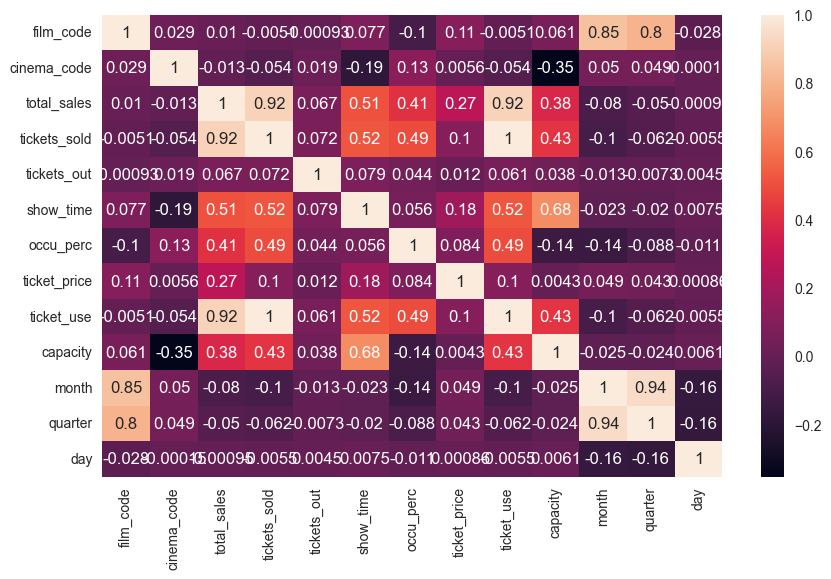

In [116]:
sns.heatmap(df.corr(numeric_only=True), annot =True);

In [117]:
df.corr(numeric_only=True)[(df.corr(numeric_only=True)>= 0.9) & (df.corr(numeric_only=True) < 1)].any().any()

True

In [118]:
df.corr(numeric_only=True)[(df.corr(numeric_only=True)<= -0.9) & (df.corr(numeric_only=True) >- 1)].any().any()

False

In [119]:
corr_by_price = df.corr(numeric_only=True)["total_sales"].sort_values()[:-1]
corr_by_price

month          -0.080
quarter        -0.050
cinema_code    -0.013
day            -0.001
film_code       0.010
tickets_out     0.067
ticket_price    0.272
capacity        0.376
occu_perc       0.414
show_time       0.511
ticket_use      0.915
tickets_sold    0.915
Name: total_sales, dtype: float64

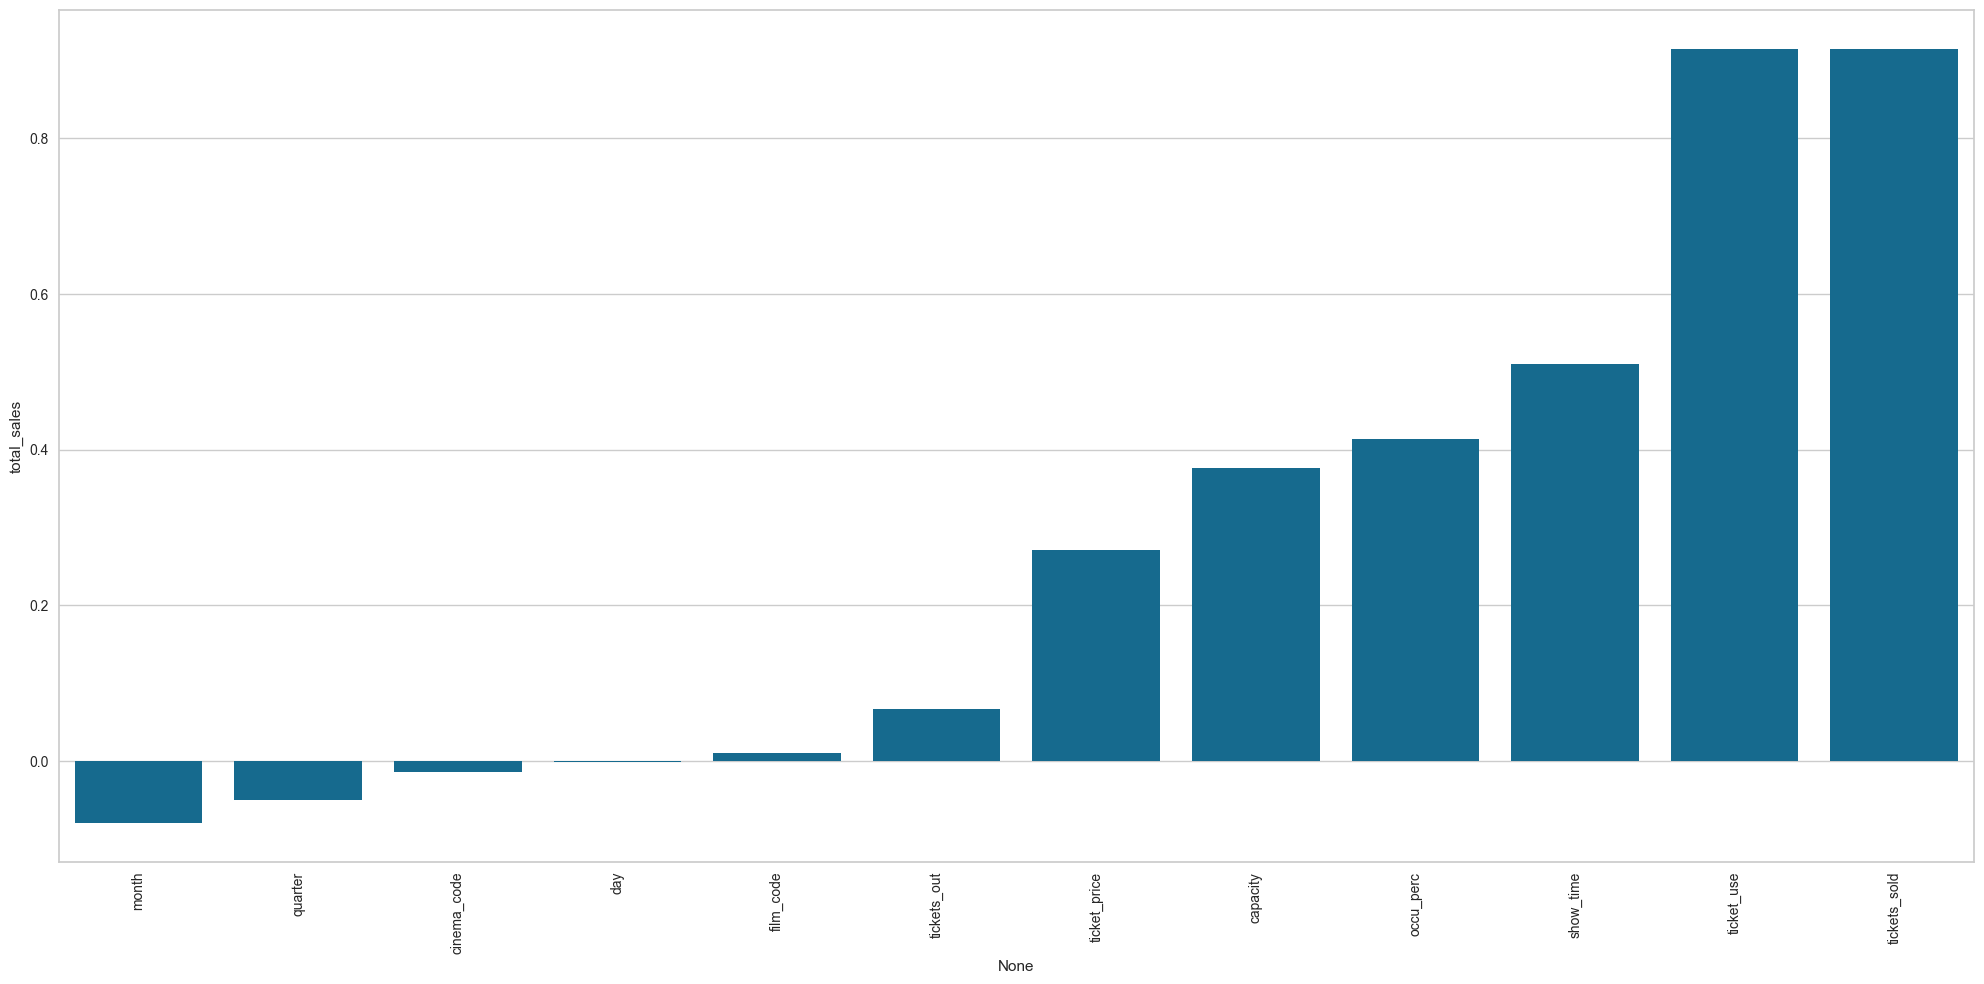

In [120]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

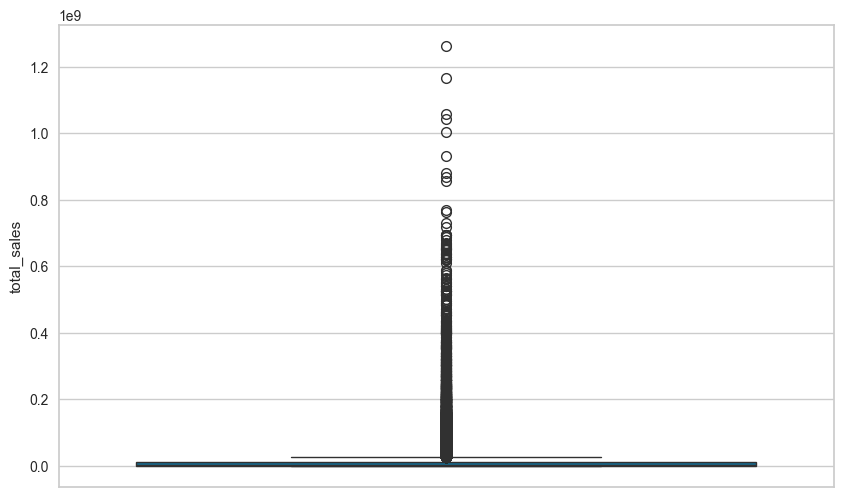

In [121]:
sns.boxplot(df.total_sales);

Train | Test Split

In [122]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

In [123]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)       # Modelin R2 değerini hesaplar
    n = df.shape[0]                     # Veri setindeki gözlem (örnek) sayısını alır
    p = df.shape[1]-1                   # Bağımsız değişkenlerin (feature ların) sayısını alır 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   # Adjusted R2 formülünü kullanarak değeri hesaplar
    return adj_r2

In [124]:
df1 = df[['tickets_sold','tickets_out', 'show_time', 'occu_perc', 'ticket_price','capacity', 'total_sales']]

In [125]:
X= df1.drop('total_sales', axis=1)
y= df1.total_sales

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
X_train.shape

(113836, 6)

In [128]:
X_test.shape

(28459, 6)

Linear Regression

In [129]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [130]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.873,0.874
mae,4932287.729,4954374.885
mse,120260089063028.922,113067695286394.141
rmse,10966316.112,10633329.454


In [131]:
y_pred = lm.predict(X_test)
adj_r2(y_test, y_pred, df)

0.8742578637694118

Cross Validate

In [132]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [133]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.078,0.020,0.874,0.873,-5022860.251,-4911281.765,-136078669024906.797,-118505749060892.031,-11665276.209,-10886034.588
1,0.082,0.010,0.864,0.874,-4977249.002,-4961461.249,-110571239141257.891,-121383027372068.188,-10515285.975,-11017396.579
2,0.055,0.014,0.882,0.872,-4959691.387,-4909688.349,-112214932895790.375,-121159154919109.188,-10593155.002,-11007231.937
3,0.063,0.014,0.867,0.874,-4889041.002,-4962445.082,-114706474850118.406,-120897739754389.469,-10710110.870,-10995350.825
4,0.082,0.012,0.867,0.874,-4844682.170,-4943047.271,-123036892557396.734,-119966665570669.875,-11092199.627,-10952929.543
5,0.065,0.012,0.864,0.874,-4879955.859,-4920750.092,-125502851585076.938,-119688236099950.906,-11202805.523,-10940211.886
6,0.039,0.008,0.879,0.872,-5063418.199,-4926827.004,-124329626344493.969,-119821291769440.688,-11150319.562,-10946291.234
7,0.038,0.007,0.868,0.874,-4863838.095,-4953321.931,-110672009163115.609,-121342465280912.188,-10520076.481,-11015555.605
8,0.038,0.006,0.874,0.873,-4964320.448,-4910453.056,-127929419530078.078,-119419118039500.219,-11310588.823,-10927905.474
9,0.031,0.006,0.884,0.872,-4876782.391,-4924422.511,-120675649546771.188,-120253276621674.281,-10985246.904,-10966005.500


In [134]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                            0.872
train_r2                                           0.873
test_neg_mean_absolute_error                -4934183.881
train_neg_mean_absolute_error               -4932369.831
test_neg_mean_squared_error         -120571776463900.594
train_neg_mean_squared_error        -120243672448860.703
test_neg_root_mean_squared_error           -10974506.498
train_neg_root_mean_squared_error          -10965491.317
dtype: float64

In [135]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.873,0.874
mae,4932287.729,4954374.885
mse,120260089063028.922,113067695286394.141
rmse,10966316.112,10633329.454


In [136]:
10633329.454/df1.total_sales.mean()

# hataya ortalamalardan baktığımız için tahmin etmek istediğimiz değerin ortalamasını alıp 
# hataların ortalamasını (error metriklerin ortalaması) tahmin etmek istediğimiz değerin ortalamasına böleceğiz

# iki ortalama değerin birbirine oranı ne kadar hata yaptğımızı gösterecek
# Müşteriye vereceğimiz test seti (hold out set) skorundan aldığımız rmse skoruna göre
# modelimiz ortalama %13.9 hata yapıyor.

0.8618130343252981

In [137]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

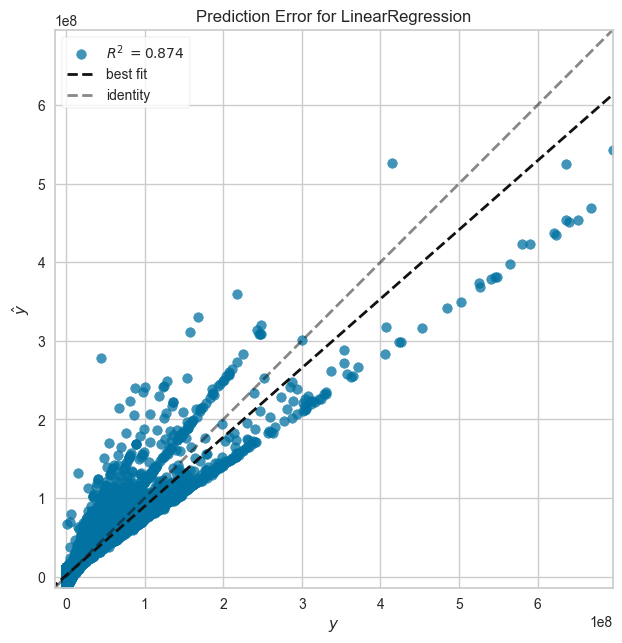

In [138]:
# hatalarımızın nasıl dağıldığına bakacağız
# modelimizi reset edeceğiz
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

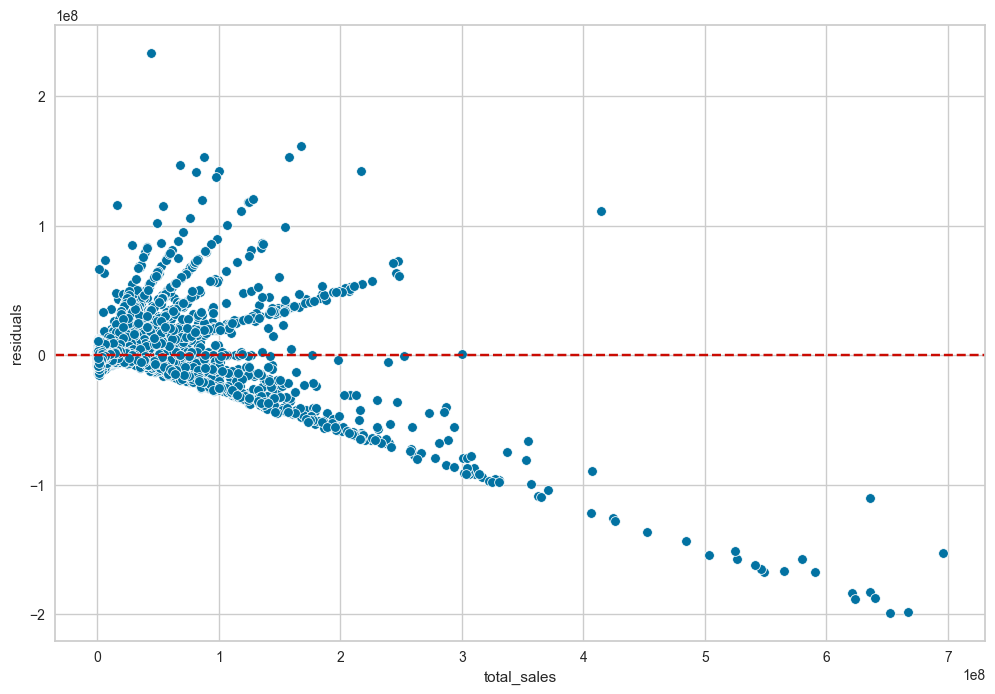

In [139]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

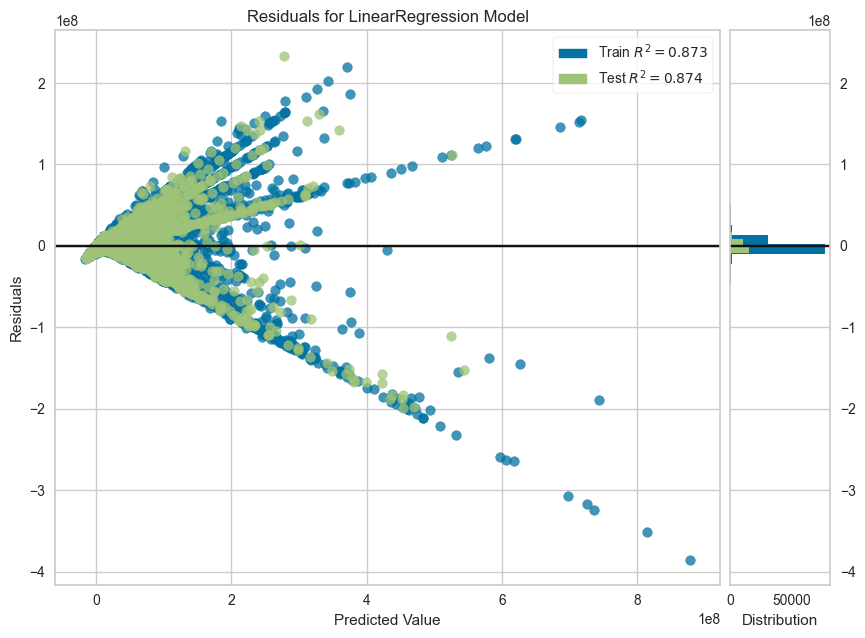

In [140]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

Dropping observations from the dataset that worsen my predictions

In [141]:
df1.total_sales.describe()

count       142295.000
mean      12338325.171
std       30627056.357
min          20000.000
25%        1270000.000
50%        3720000.000
75%       11100000.000
max     1262819994.000
Name: total_sales, dtype: float64

In [154]:
df2 = df1[~(df1.total_sales>300000000)]
df2.shape

(142043, 7)

In [171]:
X = df2.drop(columns = "total_sales")
y = df2.total_sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [175]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [176]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

In [177]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [178]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.056,0.006,0.855,0.863,-4367979.710,-4196767.698,-82818804610068.562,-74761996771602.156,-9100483.757,-8646501.996
1,0.063,0.008,0.857,0.863,-4184976.360,-4221657.954,-74877463519918.062,-75640737331790.609,-8653176.499,-8697168.351
2,0.074,0.014,0.858,0.863,-4223871.948,-4210497.123,-77132152780237.562,-75395621513290.172,-8782491.263,-8683065.214
3,0.127,0.023,0.855,0.863,-4280557.427,-4219385.152,-77974558917297.375,-75299025621842.500,-8830320.431,-8677501.116
4,0.081,0.009,0.871,0.861,-4207920.995,-4202582.806,-80667074274083.656,-75011732224383.625,-8981485.082,-8660931.372
5,0.187,0.009,0.867,0.862,-4214949.653,-4212710.594,-76331676649367.484,-75480969916417.469,-8736800.138,-8687978.471
6,0.146,0.011,0.866,0.862,-4205398.484,-4209393.384,-78352610417621.109,-75255968939603.281,-8851700.990,-8675019.824
7,0.037,0.005,0.864,0.862,-4146980.274,-4246885.398,-68877560816345.383,-76311854041782.500,-8299250.618,-8735665.632
8,0.065,0.009,0.861,0.863,-4154588.916,-4234549.855,-69362045342849.688,-76257632240138.125,-8328387.920,-8732561.608
9,0.081,0.010,0.869,0.862,-4199177.370,-4221733.498,-69973511234957.352,-76186243379130.766,-8365017.109,-8728473.141


In [179]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.863,0.861
mae,4217616.525,4252803.234
mse,75563996154621.062,78934714429852.078
rmse,8692755.383,8884521.058


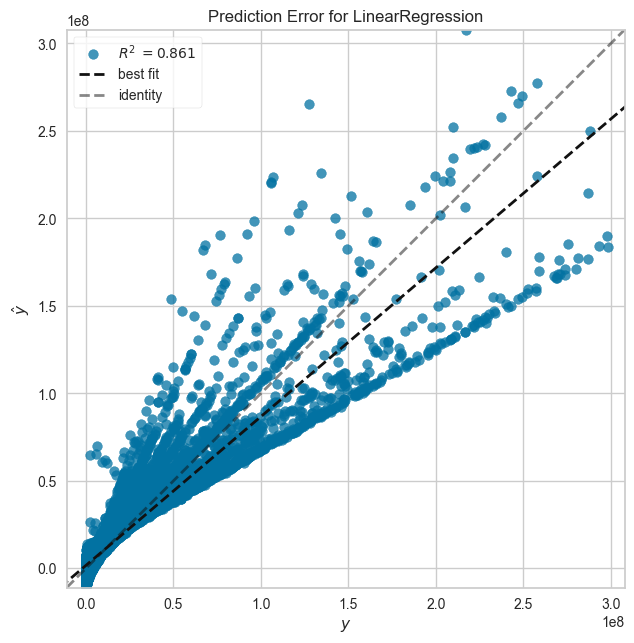

In [180]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

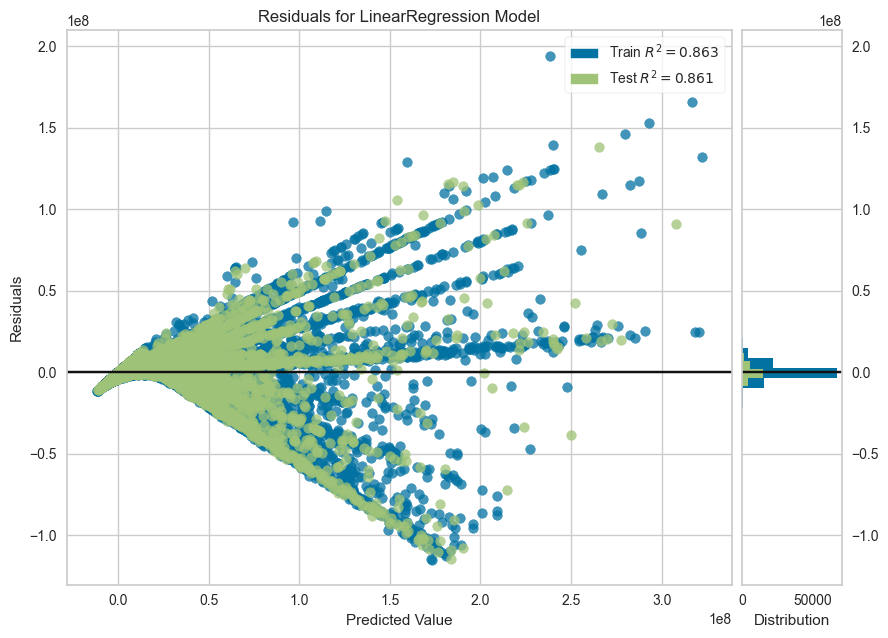

In [181]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

Cross Validation

In [182]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [183]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.067,0.022,0.855,0.863,-4367979.710,-4196767.698,-82818804610068.562,-74761996771602.156,-9100483.757,-8646501.996
1,0.065,0.004,0.857,0.863,-4184976.360,-4221657.954,-74877463519918.062,-75640737331790.609,-8653176.499,-8697168.351
2,0.043,0.007,0.858,0.863,-4223871.948,-4210497.123,-77132152780237.562,-75395621513290.172,-8782491.263,-8683065.214
3,0.043,0.004,0.855,0.863,-4280557.427,-4219385.152,-77974558917297.375,-75299025621842.500,-8830320.431,-8677501.116
4,0.049,0.004,0.871,0.861,-4207920.995,-4202582.806,-80667074274083.656,-75011732224383.625,-8981485.082,-8660931.372
5,0.054,0.003,0.867,0.862,-4214949.653,-4212710.594,-76331676649367.484,-75480969916417.469,-8736800.138,-8687978.471
6,0.077,0.027,0.866,0.862,-4205398.484,-4209393.384,-78352610417621.109,-75255968939603.281,-8851700.990,-8675019.824
7,0.172,0.017,0.864,0.862,-4146980.274,-4246885.398,-68877560816345.383,-76311854041782.500,-8299250.618,-8735665.632
8,0.084,0.010,0.861,0.863,-4154588.916,-4234549.855,-69362045342849.688,-76257632240138.125,-8328387.920,-8732561.608
9,0.062,0.050,0.869,0.862,-4199177.370,-4221733.498,-69973511234957.352,-76186243379130.766,-8365017.109,-8728473.141


In [184]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                           0.862
train_r2                                          0.863
test_neg_mean_absolute_error               -4218640.114
train_neg_mean_absolute_error              -4217616.346
test_neg_mean_squared_error         -75636745856274.641
train_neg_mean_squared_error        -75560178197998.109
test_neg_root_mean_squared_error           -8692911.381
train_neg_root_mean_squared_error          -8692486.673
dtype: float64

In [185]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.863,0.861
mae,4217616.525,4252803.234
mse,75563996154621.062,78934714429852.078
rmse,8692755.383,8884521.058


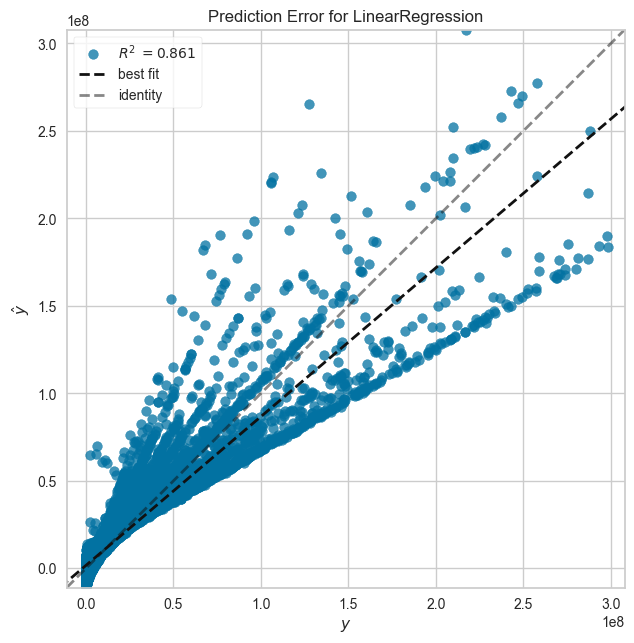

In [186]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

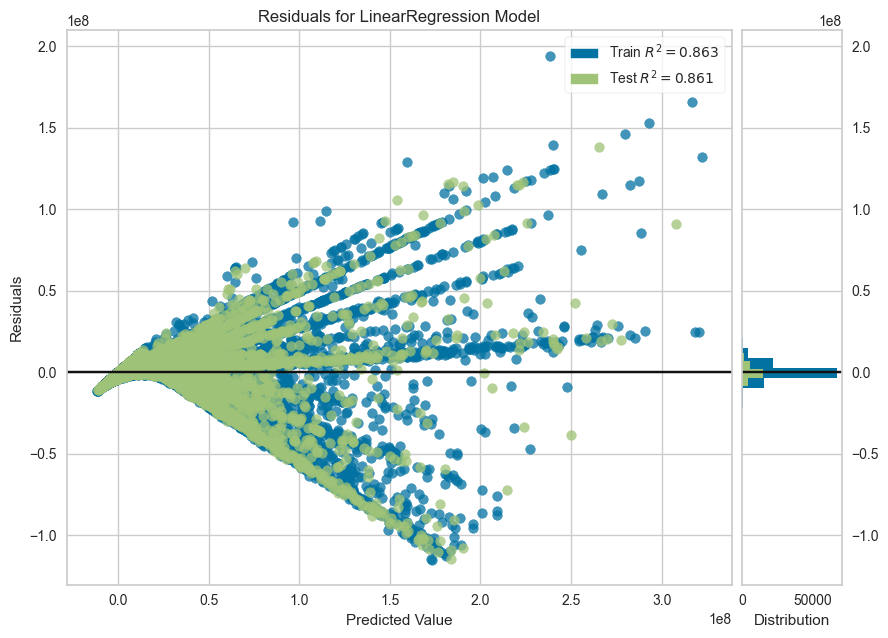

In [187]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();   

In [188]:
pd.DataFrame(lm2.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
capacity,-606965.556
occu_perc,-455230.797
tickets_out,65469.228
show_time,916759.482
ticket_price,5130848.671
tickets_sold,20756311.383


In [191]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1, random_state=42)
ridge_model.fit(X_train, y_train)

Ridge(alpha=1, random_state=42)

In [192]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.863,0.861
mae,4217605.523,4252794.936
mse,75563996230779.562,78934871915255.062
rmse,8692755.388,8884529.921


In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [195]:
ridge_model = Ridge(random_state=42) 

In [196]:
param_grid = {"alpha":alpha_space}

In [197]:
ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [198]:
ridge_grid_model.fit(X_train,y_train) 

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [199]:
ridge_grid_model.best_params_

{'alpha': 16.17}

In [200]:
ridge_grid_model.best_estimator_

Ridge(alpha=16.17, random_state=42)

In [201]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.061,0.011,0.004,0.007,0.010,{'alpha': 0.01},-9100483.615,-8653176.507,-8782491.480,-8830320.320,-8981485.376,-8736800.045,-8851700.934,-8299250.537,-8328387.923,-8365017.051,-8692911.379,264646.176,32
1,0.066,0.019,0.007,0.006,1.020,{'alpha': 1.02},-9100469.267,-8653177.333,-8782513.457,-8830309.074,-8981515.067,-8736790.643,-8851695.304,-8299242.434,-8328388.290,-8365011.234,-8692911.210,264648.734,30
2,0.065,0.011,0.004,0.004,2.030,{'alpha': 2.03},-9100454.931,-8653178.169,-8782535.442,-8830297.840,-8981544.768,-8736781.254,-8851689.686,-8299234.341,-8328388.668,-8365005.427,-8692911.053,264651.293,28
3,0.105,0.021,0.004,0.005,3.040,{'alpha': 3.04},-9100440.608,-8653179.016,-8782557.436,-8830286.617,-8981574.479,-8736771.878,-8851684.081,-8299226.259,-8328389.055,-8364999.631,-8692910.906,264653.852,26
4,0.081,0.033,0.005,0.005,4.050,{'alpha': 4.05},-9100426.296,-8653179.873,-8782579.438,-8830275.406,-8981604.199,-8736762.515,-8851678.488,-8299218.189,-8328389.453,-8364993.847,-8692910.770,264656.413,24
5,0.086,0.019,0.003,0.004,5.060,{'alpha': 5.06},-9100411.997,-8653180.739,-8782601.448,-8830264.207,-8981633.929,-8736753.164,-8851672.908,-8299210.130,-8328389.861,-8364988.074,-8692910.646,264658.974,22
6,0.063,0.011,0.005,0.003,6.070,{'alpha': 6.07},-9100397.710,-8653181.616,-8782623.467,-8830253.020,-8981663.669,-8736743.826,-8851667.341,-8299202.081,-8328390.279,-8364982.312,-8692910.532,264661.537,20
7,0.059,0.015,0.001,0.001,7.080,{'alpha': 7.08},-9100383.436,-8653182.504,-8782645.495,-8830241.844,-8981693.419,-8736734.501,-8851661.786,-8299194.045,-8328390.708,-8364976.561,-8692910.430,264664.100,18
8,0.054,0.013,0.003,0.004,8.090,{'alpha': 8.09},-9100369.173,-8653183.401,-8782667.531,-8830230.680,-8981723.178,-8736725.189,-8851656.243,-8299186.019,-8328391.146,-8364970.822,-8692910.338,264666.664,16
9,0.051,0.009,0.001,0.001,9.100,{'alpha': 9.1},-9100354.923,-8653184.308,-8782689.575,-8830219.528,-8981752.947,-8736715.889,-8851650.714,-8299178.004,-8328391.595,-8364965.093,-8692910.258,264669.229,14


In [202]:
ridge_grid_model.best_index_

16

In [203]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.863,0.861
mae,4217439.830,4252670.634
mse,75564016050516.438,78937278995941.109
rmse,8692756.528,8884665.385


In [204]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [206]:
ridge = Ridge(alpha=16.17, random_state=42).fit(X_train, y_train)

pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
capacity,-604583.349
occu_perc,-451417.829
tickets_out,65577.249
show_time,918084.137
ticket_price,5130140.096
tickets_sold,20749841.732


In [208]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(random_state=42, alpha=1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1, random_state=42)

In [209]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.863,0.861
mae,4217616.042,4252802.754
mse,75563996154636.812,78934714311373.328
rmse,8692755.383,8884521.051


In [210]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [211]:
lasso_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [212]:
lasso_grid_model.best_params_

{'alpha': 100.0}

In [213]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.863,0.861
mae,4217568.306,4252755.370
mse,75563996314426.781,78934704994905.234
rmse,8692755.393,8884520.527


In [214]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [215]:
lasso = Lasso(alpha=100, random_state=42).fit(X_train, y_train)
pd.DataFrame(lasso.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
capacity,-606495.515
occu_perc,-454853.206
tickets_out,65381.947
show_time,916514.516
ticket_price,5130794.079
tickets_sold,20755954.202


In [218]:
X_train

array([[-0.40827137, -0.08052778, -0.30444219, -0.51854298,  2.07713061,
        -0.43324418],
       [-0.12646681, -0.08052778,  0.37420353,  0.02322858, -0.10419665,
        -0.35971694],
       [-0.51602017, -0.08052778, -0.30444219, -0.77060187, -0.03457982,
        -0.47201411],
       ...,
       [ 0.677505  , -0.08052778, -0.30444219,  1.10189886,  0.56876601,
        -0.19316793],
       [ 0.18020285, -0.08052778,  0.37420353,  1.0292492 , -0.63792566,
        -0.46333021],
       [-0.4538574 , -0.08052778, -0.30444219, -0.72763225, -0.63792566,
        -0.12839844]])

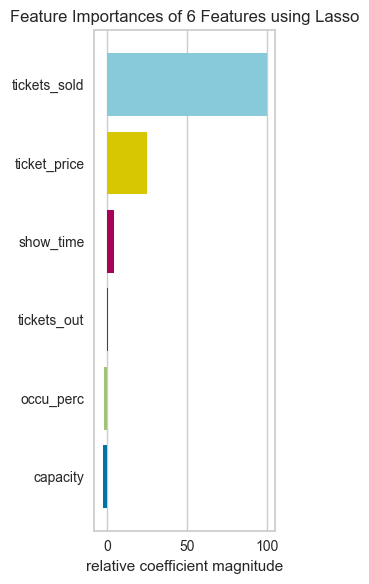

<Axes: title={'center': 'Feature Importances of 6 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [224]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=100), labels=df2.columns)
visualizer = RadViz(size=(300, 600))
viz.fit(X_train, y_train)
viz.show()

In [226]:
scores = {
    "linear_m": {
        "r2_score": lm_R2,
        "mae": lm_mae,
        "rmse": lm_rmse
    },
    "ridge_m": {
        "r2_score": rm_R2,
        "mae": rm_mae,
        "rmse": rm_rmse
    },
    "lasso_m": {
        "r2_score": lasm_R2,
        "mae": lasm_mae,
        "rmse": lasm_rmse
    }
}
scores = pd.DataFrame(scores).T
scores

NameError: name 'lm_R2' is not defined